In [19]:
import numpy as np

In [20]:
class Perceptron:
  """
  Perceptron classifier

  Parameters:
  -------------
  eta : float
      Learning rate (between 0.0 and 1.0)
  n_iter : int
      Passes over the training dataset
  random_state : int
      Random number generator seed for random weight initialisation and reproducibility

  Attributes:
  ---------------
  w_ : 1D array
    weights after fitting
  b_ : scalar
    bias unit after fitting
  errors_ : list
    Number of misclassifications (updates) in each epoch
  """

  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    """
    Fit the training data

    Parameters:
    ----------------------
    X : {array-like}, shape = [n_examples, n_features]
      Training vectors, where n_examples is the number of training examples
      and
      n_features is the number of features

    y : array-like, shape = [n_examples]
      Target values

    Returns
    -------------
    self : object
    """

    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
    self.b_ = np.float_(0.)
    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X, y):
        update = self.eta * (target - self.predict(xi))
        self.w_ += update * xi
        self.b_ += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.w_) + self.b_

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.net_input(X) >= 0.0, 1, 0)


In [21]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

0.0

In [22]:
np.linalg.norm(v1)

3.7416573867739413

In [23]:
import os
import pandas as pd

s = 'https://archive.ics.uci.edu/ml/'\
   'machine-learning-databases/iris/iris.data'

print(f"URL : {s}")

URL : https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [24]:
df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [25]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
df.iloc[:,4].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Now we select only 2 class labels - versicolor and setosa

We will rename the labels to an integer value ⁉

* versicolor -> 1

* setosa -> 0

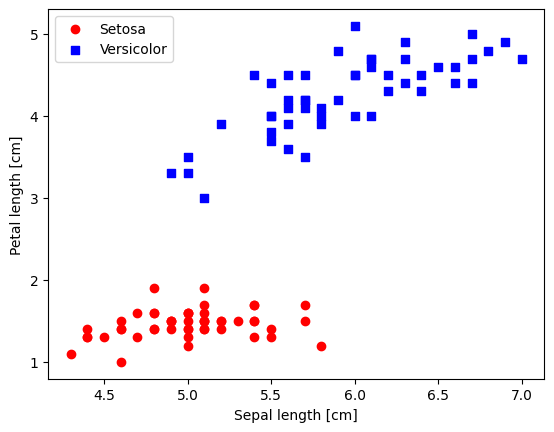

In [27]:
import matplotlib.pyplot as plt
import numpy as np

#Select setosa and versicolor

y = df.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", 0, 1)
#extract sepal length and petal length

X = df.iloc[0:100, [0, 2]].values

#plot data
plt.scatter(X[:50, 0], X[:50, 1], color='r', marker='o', label='Setosa')
plt.scatter(X[50:, 0], X[50:, 1], color='blue', marker='s', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

The above graph shows that the 2 classes - Setosa and Versicolor are linearly separable

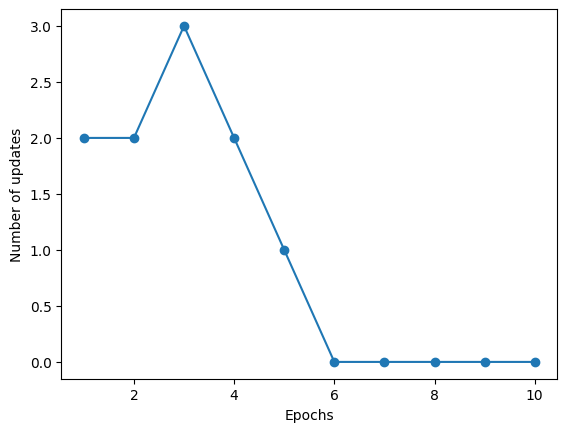

In [28]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [29]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):
  #setup marker generator and color map
  markers = ('o', 's', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  #plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  #Plot class examples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha = 0.8,
                c = colors[idx],
                marker = markers[idx],
                label = f'Class {cl}',
                edgecolor = 'black')

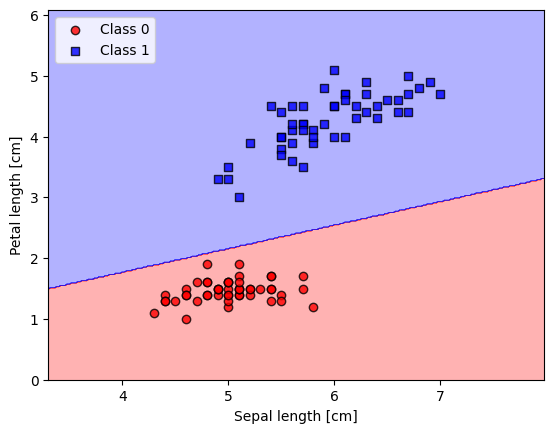

In [30]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# Optional

In [31]:
class Perceptron:
  """
  Perceptron classifier

  Parameters:
  -------------
  eta : float
      Learning rate (between 0.0 and 1.0)
  n_iter : int
      Passes over the training dataset
  random_state : int
      Random number generator seed for random weight initialisation and reproducibility

  Attributes:
  ---------------
  w_ : 1D array
    weights after fitting
  b_ : scalar
    bias unit after fitting
  errors_ : list
    Number of misclassifications (updates) in each epoch
  """

  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    """
    Fit the training data

    Parameters:
    ----------------------
    X : {array-like}, shape = [n_examples, n_features]
      Training vectors, where n_examples is the number of training examples
      and
      n_features is the number of features

    y : array-like, shape = [n_examples]
      Target values

    Returns
    -------------
    self : object
    """

    rgen = np.random.RandomState(self.random_state)
    self.w_ = np.zeros(X.shape[1])
    self.b_ = np.float_(0.)
    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X, y):
        update = self.eta * (target - self.predict(xi))
        self.w_ += update * xi
        self.b_ += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.w_) + self.b_

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.net_input(X) >= 0.0, 1, 0)


# Implementing Adaline in Python

In [40]:
class AdalineGD:
  """
  ADAptive LInear NEuron classifier

  Parameters:
  ---------------
  eta : float
    Learning rate (between 0 and 1)
  n_iter : int
    Passes over the training dataset
  random_state : int
    Random number generator seed for random_weight initialisation

  Attributes:
  -------------------
  w_ : 1d-array
    Weights after fitting
  b_ : Scalar
    Bias unit after fitting
  losses_ : list
    Mean squared error loss function values in each epoch
  """

  def __init__(self, eta=0.02, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    """
    Fit the training data

    Parameters:
    ----------------------
    X : {array-like}, shape = [n_examples, n_features]
      Training vectors, where n_examples is the number of examples and
      n_features -> number of features
    y : {array-like}, shape = [n_examples]
      Target values / class labels

    Returns:
    ------------------
    self : object
    """

    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
    self.b_ = np.float_(0.)
    self.losses_ = []

    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = ( y - output)
      self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
      self.b_ += self.eta * 2.0 * errors.mean()
      loss = (errors ** 2).mean()
      self.losses_.append(loss)
    return self


  def net_input(self, X):
    """
    Calculate the net input
    """
    return np.dot(X, self.w_) + self.b_

  def activation(self, X):
    """
    Compute linear activation
    """
    return X

  def predict(self, X):
    """
    Return class label after unit step
    """
    return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

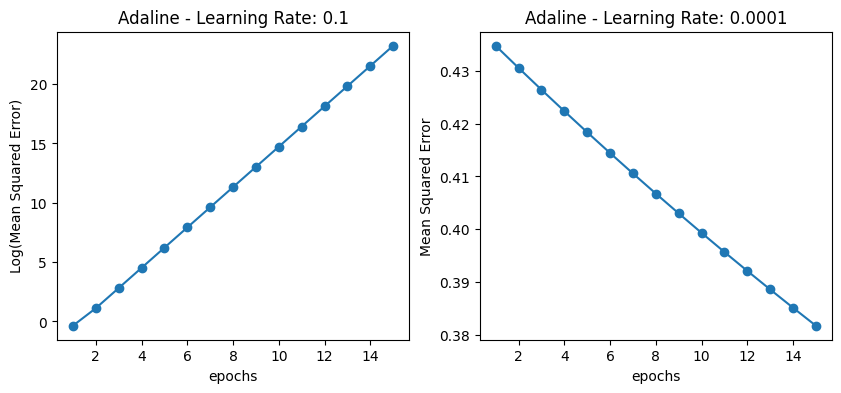

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('Log(Mean Squared Error)')
ax[0].set_title('Adaline - Learning Rate: 0.1')

ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_)+1), ada2.losses_, marker='o')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('Mean Squared Error')
ax[1].set_title('Adaline - Learning Rate: 0.0001')
plt.show()

# Feature Scaling / Standardisation / Normalisation?

In [42]:
X_std = np.copy(X)
X_std[:, 0] = (X_std[:, 0] - X_std[:, 0].mean()) / X_std[:, 0].std()
X_std[:, 1] = (X_std[:, 1] - X_std[:, 1].mean()) / X_std[:, 1].std()

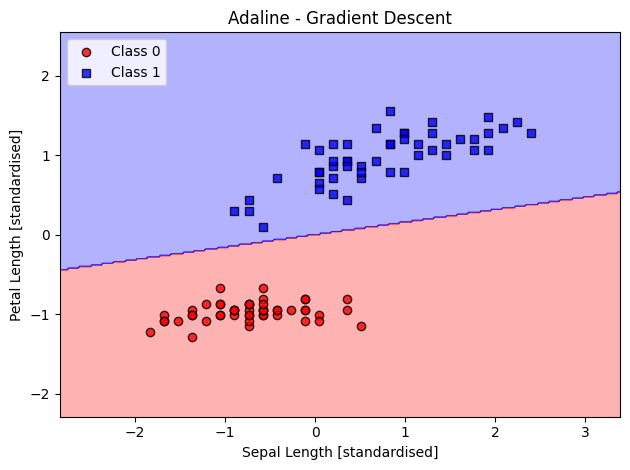

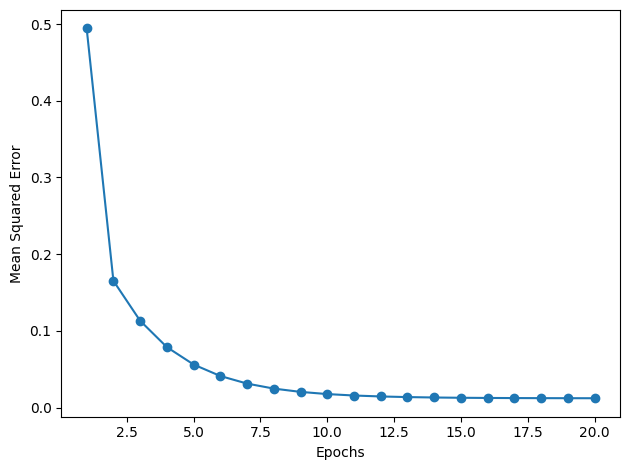

In [48]:
ada_gd = AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('Sepal Length [standardised]')
plt.ylabel('Petal Length [standardised]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.tight_layout()
plt.show()

In [51]:
class AdalineSGD:
  """
  ADAptive LInear NEuron classifier

  Parameters:
  ---------------
  eta : float
    Learning rate (between 0 and 1)
  n_iter : int
    Passes over the training dataset
  shuffle : bool (default = True)
    Shuffles the training data every epoch if True to prevent cycles
  random_state : int
    Random number generator seed for random_weight initialisation

  Attributes:
  -------------------
  w_ : 1d-array
    Weights after fitting
  b_ : Scalar
    Bias unit after fitting
  losses_ : list
    Mean squared error loss function values in each epoch
  """

  def __init__(self, eta=0.02, n_iter=50, shuffle=True, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.shuffle = shuffle
    self.random_state = random_state

  def fit(self, X, y):
    """
    Fit the training data

    Parameters:
    ----------------------
    X : {array-like}, shape = [n_examples, n_features]
      Training vectors, where n_examples is the number of examples and
      n_features -> number of features
    y : {array-like}, shape = [n_examples]
      Target values / class labels

    Returns:
    ------------------
    self : object
    """
    self._initialize_weights(X.shape[1])
    self.losses_ = []
    for i in range(self.n_iter):
      if self.shuffle:
        X, y = self._shuffle(X, y)
      losses = []
      for xi, target in zip(X, y):
        losses.append(self._update_weights(xi, target))
      avg_loss = np.mean(losses)
      self.losses_.append(avg_loss)
    return self


  def partial_fit(self, X, y):
    """
    Fit training data without reinitialising the weights
    """
    if not self.w_initialized:
      self._initialize_weights(X.shape[1])
    if y.ravel().shape[0] > 1:
      for xi, target in zip(X, y):
        self._update_weights(xi, target)
    else:
      self._update_weights(X, y)
    return self

  def _shuffle(self, X, y):
    """
    Shuffles training data
    """
    r = self.rgen.permutation(len(y))
    return X[r], y[r]

  def _initialize_weights(self, m):
    """
    Initialise the weights to small random numbers
    """
    self.rgen = np.random.RandomState(self.random_state)
    self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
    self.b_ = np.float_(0)
    self.w_initialized = True

  def _update_weights(self, xi, target):
    """
    Apply Adaline Learning rule to update the weights
    """
    output = self.activation(self.net_input(xi))
    error = (target - output)
    self.w_ += self.eta * 2.0 * xi * (error)
    self.b_ += self.eta * 2.0 * error
    loss = error ** 2
    return loss

  def net_input(self, X):
    """
    Calculate the net input
    """
    return np.dot(X, self.w_) + self.b_

  def activation(self, X):
    """
    Compute linear activation
    """
    return X


  def predict(self, X):
    """
    Return class label after unit step
    """
    return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)



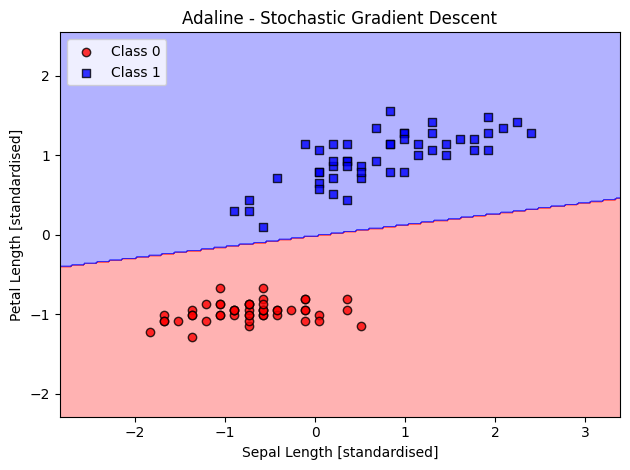

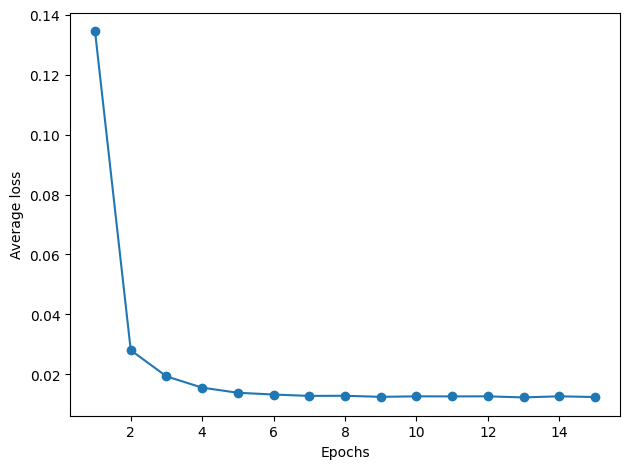

In [52]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('Sepal Length [standardised]')
plt.ylabel('Petal Length [standardised]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')
plt.tight_layout()
plt.show()